In [1]:
import numpy as np
import matplotlib.pyplot as plt

from wows_shell import *

In [2]:
#height formulas by warabi99
def get_camera_angle(x):
    x_km = x/1000
    height = 1.1972*x_km*x_km + 14.595*x_km
    angle = np.arctan(height/x)
    return angle

def get_spotter_angle(x):
    x_km = x/1000
    height_km = 0.0075*x_km*x_km - 0.0427*x_km 
    height = height_km*1000
    angle = np.arctan(height/x)
    return angle


#s = shell(shellParams(.220, 985, .2549, 176.0, 2590, 7.0, .033, 37, 45, 60.0, 0), "Moskva")
s = shell(shellParams(.460, 780, .292, 1460, 2574, 6, .033, 76, 45, 60, 0), "Yamato")
c = shellCalc()
c.setMax(25)
c.calcImpactForwardEuler(s, addTraj=True) 

impact = s.getImpact()

distances = impact[int(impactIndices.distance), :]
camera_angles = np.degrees(get_camera_angle(distances))
spotter_angles = np.degrees(get_spotter_angle(distances))

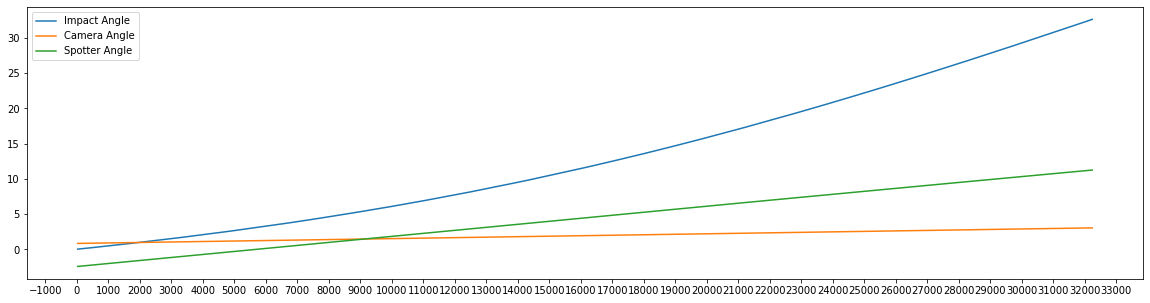

In [3]:
plt.rcParams['figure.figsize'] = [20, 5]

fig, ax = plt.subplots(1,1)

ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
#ax.set_xlim(0, 20000)
#ax.set_ylim(0, 4)

ax.plot(distances, impact[int(impactIndices.impactAngleHorizontalDegrees)])
ax.plot(distances, camera_angles)
ax.plot(distances, spotter_angles)

ax.legend(['Impact Angle', 'Camera Angle', 'Spotter Angle'])

plt.show()